# Transforming workflow for coeanography study using S2 data, from SAFE to ZARR

This is a part of  notebook which we will show the example of transformation of research workflow using SAFE file format to new EOPF ZARR format. 


We use example from a repository https://github.com/cuevas-a97/S2_Codes , which shows the computation of oceanic current using S2L1C images. 

To understand the scientific background of this notebook, please reffer to https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016JC012425

This notebook  show the workflow using zarr format.  

All the research sofware that was used in https://github.com/cuevas-a97/S2_Codes, was specifying manually the choise of zone and time for the usage.

Using the EOPF ZARR stac capability, these procedures may be automatised.

in this notebook we will show some example of some possible way to play arouond with these capabilities. 

You can test this notebook using following docker image

> docker.io/tinaok/eopf-webiner6-docker:latest



## Access the Analysisi Ready Clowed Optimised EOPF ZARR  file
### Import dependencies accessing the  EOPF ZARR format. 

It is very easy. I used EOPF Sample service example notebook and just copied pasted some cells. 
https://eopf-sample-service.github.io/eopf-sample-notebooks/stac-eopf-zarr-sentinel



In [1]:
#import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pystac_client
import xarray as xr
from pystac_client import CollectionSearch
#from matplotlib.gridspec import GridSpec
import hvplot.xarray

### Use pystac client and connect to the eopf zarr data

In [2]:
#lets try to specify 'ocean' point and see if we have any specific metadta to collect 'ocean' parts from stac catalog,

catalog = pystac_client.Client.open("https://stac.core.eopf.eodc.eu")
LON, LAT = -4.5, 48

date = "2025-07-07/2025-07-11"
date = "2025-01-01/2025-03-01"

collections=['sentinel-2-l1c']
#collections=['sentinel-2-l2a']

#collections=['sentinel-2-l1c','sentinel-2-l2a']
# Search with cloud cover filter
items = list(
    catalog.search(
#        datetime=date,
        collections=collections,
    intersects=dict(type="Point", coordinates=[LON, LAT]),
    ).items()
)

for item in items:
        print(f"✅ {item.id}")
    # Print properties clearly
        #print("Metadata properties:\n")
        #for key, value in item.properties.items():
        #    print(f"- {key}: {value}")   

✅ S2B_MSIL1C_20250717T112119_N0511_R037_T30UUU_20250717T131758
✅ S2A_MSIL1C_20250714T112131_N0511_R037_T30UUU_20250714T135220
✅ S2B_MSIL1C_20250707T112119_N0511_R037_T30UUU_20250707T131612
✅ S2A_MSIL1C_20250704T112131_N0511_R037_T30UUU_20250704T150040
✅ S2C_MSIL1C_20250702T112141_N0511_R037_T30UUU_20250702T134437
✅ S2B_MSIL1C_20250627T112119_N0511_R037_T30UUU_20250627T131553
✅ S2A_MSIL1C_20250624T112131_N0511_R037_T30UUU_20250624T135219
✅ S2C_MSIL1C_20250622T112131_N0511_R037_T30UUU_20250622T120825
✅ S2B_MSIL1C_20250617T112109_N0511_R037_T30UUU_20250617T131418
✅ S2A_MSIL1C_20250614T112131_N0511_R037_T30UUU_20250614T145517
✅ S2C_MSIL1C_20250612T112131_N0511_R037_T30UUU_20250612T131903
✅ S2B_MSIL1C_20250607T112109_N0511_R037_T30UUU_20250607T131528
✅ S2A_MSIL1C_20250604T112131_N0511_R037_T30UUU_20250604T135331
✅ S2C_MSIL1C_20250602T112131_N0511_R037_T30UUU_20250602T131953
✅ S2B_MSIL1C_20250528T112119_N0511_R037_T30UUU_20250528T131527
✅ S2A_MSIL1C_20250525T112131_N0511_R037_T30UUU_20250525

In [3]:
import pandas as pd

records = []

for item in items:
    props = item.properties
    records.append({
        "id": item.id,
        "datetime": props.get("datetime"),
        "start_datetime": props.get("start_datetime"),
        "platform": props.get("platform"),
        "constellation": props.get("constellation"),
        "processing:level": props.get("processing:level"),
        "processing:lineage": props.get("processing:lineage"),
        "product:timeliness": props.get("product:timeliness"),
        "sat:orbit_state": props.get("sat:orbit_state"),
        "sat:absolute_orbit": props.get("sat:absolute_orbit"),
        "sat:relative_orbit": props.get("sat:relative_orbit"),
        "eo:cloud_cover": props.get("eo:cloud_cover"),
        "eo:snow_cover": props.get("eo:snow_cover"),
        "view:sun_azimuth": props.get("view:sun_azimuth"),
        "view:sun_elevation": props.get("view:sun_elevation"),
        "grid:code": props.get("grid:code"),
        "mgrs:utm_zone": props.get("mgrs:utm_zone"),
        "mgrs:latitude_band": props.get("mgrs:latitude_band"),
        "mgrs:grid_square": props.get("mgrs:grid_square"),
        "proj:centroid_lon": props.get("proj:centroid", {}).get("lon"),
        "proj:centroid_lat": props.get("proj:centroid", {}).get("lat"),
    })

df = pd.DataFrame(records)
df["datetime"] = pd.to_datetime(df["datetime"])
df = df.sort_values("datetime").set_index("datetime")
#df = df.set_index("datetime")  # Set datetime as index for easier plotting
df

,id,start_datetime,platform,constellation,processing:level,processing:lineage,product:timeliness,sat:orbit_state,sat:absolute_orbit,sat:relative_orbit,eo:cloud_cover,eo:snow_cover,view:sun_azimuth,view:sun_elevation,grid:code,mgrs:utm_zone,mgrs:latitude_band,mgrs:grid_square,proj:centroid_lon,proj:centroid_lat
datetime,,,,,,,,,,,,,,,,,,,,
2025-04-15 11:21:31.024000+00:00,S2A_MSIL1C_20250415T112131_N0511_R037_T30UUU_2...,2025-04-15T11:21:31.024000Z,sentinel-2a,sentinel-2,L1C,IPF L1C processor,PT3H,descending,51257,37,87.135298,0.721670,159.898664,39.800190,MGRS-30UUU,30,U,UU,-4.95439,48.24168
2025-04-18 11:21:19.024000+00:00,S2B_MSIL1C_20250418T112119_N0511_R037_T30UUU_2...,2025-04-18T11:21:19.024000Z,sentinel-2b,sentinel-2,L1C,IPF L1C processor,PT3H,descending,42391,37,99.309624,0.105109,159.703078,38.744684,MGRS-30UUU,30,U,UU,-4.95439,48.24168
2025-04-23 11:21:41.025000+00:00,S2C_MSIL1C_20250423T112141_N0511_R037_T30UUU_2...,2025-04-23T11:21:41.025000Z,sentinel-2c,sentinel-2,L1C,IPF L1C processor,PT3H,descending,3296,37,66.496671,0.002060,159.566107,37.017725,MGRS-30UUU,30,U,UU,-4.95439,48.24168
2025-04-25 11:21:31.024000+00:00,S2A_MSIL1C_20250425T112131_N0511_R037_T30UUU_2...,2025-04-25T11:21:31.024000Z,sentinel-2a,sentinel-2,L1C,IPF L1C processor,PT3H,descending,51400,37,80.194631,0.002060,159.391334,36.368355,MGRS-30UUU,30,U,UU,-4.95439,48.24168
2025-04-28 11:21:19.024000+00:00,S2B_MSIL1C_20250428T112119_N0511_R037_T30UUU_2...,2025-04-28T11:21:19.024000Z,sentinel-2b,sentinel-2,L1C,IPF L1C processor,PT3H,descending,42534,37,1.433396,0.000000,159.094295,35.426901,MGRS-30UUU,30,U,UU,-4.95439,48.24168
2025-05-03 11:21:31.025000+00:00,S2C_MSIL1C_20250503T112131_N0511_R037_T30UUU_2...,2025-05-03T11:21:31.025000Z,sentinel-2c,sentinel-2,L1C,IPF L1C processor,PT3H,descending,3439,37,7.916241,0.000000,158.816354,33.906078,MGRS-30UUU,30,U,UU,-4.95439,48.24168
2025-05-05 11:21:31.024000+00:00,S2A_MSIL1C_20250505T112131_N0511_R037_T30UUU_2...,2025-05-05T11:21:31.024000Z,sentinel-2a,sentinel-2,L1C,IPF L1C processor,PT3H,descending,51543,37,21.613097,0.000000,158.571469,33.347473,MGRS-30UUU,30,U,UU,-4.95439,48.24168
2025-05-08 11:21:19.024000+00:00,S2B_MSIL1C_20250508T112119_N0511_R037_T30UUU_2...,2025-05-08T11:21:19.024000Z,sentinel-2b,sentinel-2,L1C,IPF L1C processor,PT3H,descending,42677,37,62.164741,0.002060,158.184367,32.547090,MGRS-30UUU,30,U,UU,-4.95439,48.24168
2025-05-13 11:21:31.025000+00:00,S2C_MSIL1C_20250513T112131_N0511_R037_T30UUU_2...,2025-05-13T11:21:31.025000Z,sentinel-2c,sentinel-2,L1C,IPF L1C processor,PT3H,descending,3582,37,44.341217,0.195885,157.722135,31.284774,MGRS-30UUU,30,U,UU,-4.95439,48.24168


In [4]:
import hvplot.xarray

ds = xr.Dataset.from_dataframe(df)
ds["view:sun_elevation"].hvplot(kind='scatter',marker='o', figsize=(10, 5))

:Scatter   [datetime]   (view:sun_elevation)

In [5]:
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

# Plot 1: Cloud Cover (left y-axis)
cloud_plot = ds["eo:cloud_cover"].hvplot.scatter(
    label='Cloud Cover (%)',
    color='blue',
    ylabel='Cloud Cover (%)',
    width=800,
    height=400,
    marker='o'
)

# Plot 2: Sun Elevation (right y-axis)
sun_plot = ds["view:sun_elevation"].hvplot.scatter(
    label='Sun Elevation (°)',
    color='orange',
    yaxis='right',
    ylabel='Sun Elevation (°)',
    width=800,
    height=400,
    marker='x'
)

# Combine both plots
cloud_plot * sun_plot

:Overlay
   .Scatter.Cloud_Cover_left_parenthesis_percent_right_parenthesis  :Scatter   [datetime]   (eo:cloud_cover)
   .Scatter.Sun_Elevation_left_parenthesis_degree_right_parenthesis :Scatter   [datetime]   (view:sun_elevation)

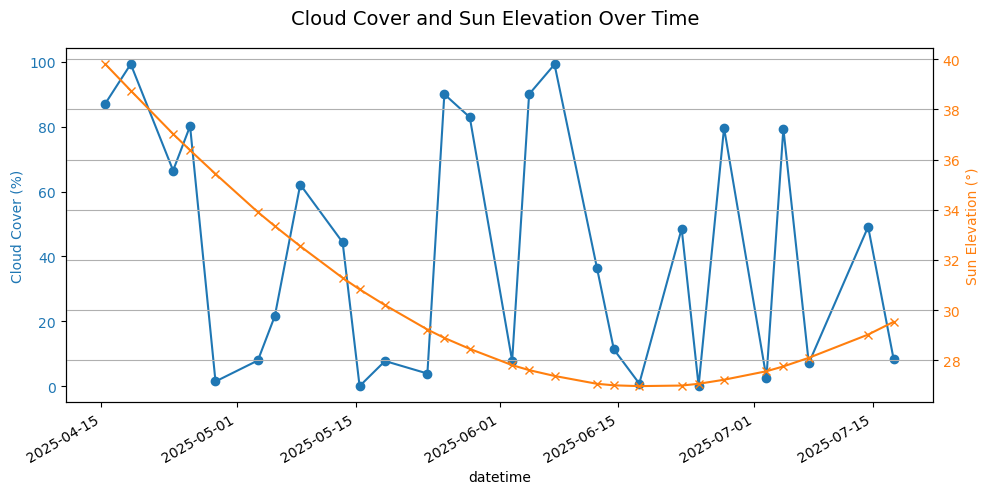

In [6]:
import matplotlib.pyplot as plt

# Make sure datetime is index
df_plot = df.copy()
df_plot = df_plot.sort_index()

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Left y-axis: Cloud Cover
color1 = "tab:blue"
df_plot["eo:cloud_cover"].plot(ax=ax1, color=color1, marker='o', label="Cloud Cover (%)")
ax1.set_ylabel("Cloud Cover (%)", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Right y-axis: Sun Elevation
ax2 = ax1.twinx()
color2 = "tab:orange"
df_plot["view:sun_elevation"].plot(ax=ax2, color=color2, marker='x', label="Sun Elevation (°)")
ax2.set_ylabel("Sun Elevation (°)", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Title and layout
fig.suptitle("Cloud Cover and Sun Elevation Over Time", fontsize=14)
fig.tight_layout()
plt.grid(True)
plt.show()

In [7]:
item = items[1]  # extracting the first item

l1c = xr.open_dataset(
    item.assets["product"].href,
    **item.assets["product"].extra_fields["xarray:open_datatree_kwargs"],
)#.compute()  
l1c

/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: Engine 'kerchunk' loading failed:
No module named 'zarr.core.array_spec'; 'zarr.core' is not a package
  external_backend_entrypoints = backends_dict_from_pkg(entrypoints_unique)


<xarray.Dataset> Size: 7GB
Dimensions:                                            (
                                                        conditions_geometry_angle: 2,
                                                        conditions_geometry_band: 13,
                                                        conditions_geometry_y: 23,
                                                        conditions_geometry_x: 23,
                                                        conditions_geometry_detector: 7,
                                                        ...
                                                        quality_mask_r10m_y: 10980,
                                                        quality_mask_r10m_x: 10980,
                                                        quality_mask_r20m_y: 5490,
                                                        quality_mask_r20m_x: 5490,
                                                        quality_mask_r60m_y: 1830,
                                                        quality_mask_r60m_x: 1830)
Coordinates: (12/44)
  * conditions_geometry_angle                          (conditions_geometry_angle) <U7 56B ...
  * conditions_geometry_band                           (conditions_geometry_band) <U3 156B ...
  * conditions_geometry_detector                       (conditions_geometry_detector) int64 56B ...
  * conditions_geometry_x                              (conditions_geometry_x) int64 184B ...
  * conditions_geometry_y                              (conditions_geometry_y) int64 184B ...
  * conditions_mask_detector_footprint_r10m_x          (conditions_mask_detector_footprint_r10m_x) int64 88kB ...
    ...                                                 ...
  * quality_mask_r10m_x                                (quality_mask_r10m_x) int64 88kB ...
  * quality_mask_r10m_y                                (quality_mask_r10m_y) int64 88kB ...
  * quality_mask_r20m_x                                (quality_mask_r20m_x) int64 44kB ...
  * quality_mask_r20m_y                                (quality_mask_r20m_y) int64 44kB ...
  * quality_mask_r60m_x                                (quality_mask_r60m_x) int64 15kB ...
  * quality_mask_r60m_y                                (quality_mask_r60m_y) int64 15kB ...
Data variables: (12/62)
    conditions_geometry_mean_sun_angles                (conditions_geometry_angle) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    conditions_geometry_mean_viewing_incidence_angles  (conditions_geometry_band, conditions_geometry_angle) float64 208B dask.array<chunksize=(13, 2), meta=np.ndarray>
    conditions_geometry_sun_angles                     (conditions_geometry_angle, conditions_geometry_y, conditions_geometry_x) float64 8kB dask.array<chunksize=(2, 23, 23), meta=np.ndarray>
    conditions_geometry_viewing_incidence_angles       (conditions_geometry_band, conditions_geometry_detector, conditions_geometry_angle, conditions_geometry_y, conditions_geometry_x) float64 770kB dask.array<chunksize=(7, 4, 2, 23, 23), meta=np.ndarray>
    conditions_mask_detector_footprint_r10m_b02        (conditions_mask_detector_footprint_r10m_y, conditions_mask_detector_footprint_r10m_x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
    conditions_mask_detector_footprint_r10m_b03        (conditions_mask_detector_footprint_r10m_y, conditions_mask_detector_footprint_r10m_x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
    ...                                                 ...
    quality_mask_r20m_b11                              (quality_mask_r20m_y, quality_mask_r20m_x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    quality_mask_r20m_b12                              (quality_mask_r20m_y, quality_mask_r20m_x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    quality_mask_r20m_b8a                              (quality_mask_r20m_y, quality_mask_r20m_x) uint8 30MB dask.array<chunks

In [8]:
l1c.attrs
l1c.attrs["stac_discovery"]["geometry"]
#            ],  # Use the actual geometry, not the bbox
#            "properties": dt.attrs["stac_discovery"][
#                "properties"
#            ],  # Include all properties
import geopandas as gpd

# Create a GeoDataFrame from the feature
gdf = gpd.GeoDataFrame.from_features(
    [
        {
            "type": "Feature",
            "geometry": l1c.attrs["stac_discovery"][
                "geometry"
            ],  # Use the actual geometry, not the bbox
            "properties": l1c.attrs["stac_discovery"][
                "properties"
            ],  # Include all properties
        }
    ],
    crs="EPSG:4326",  # Set the CRS explicitly (adjust EPSG code if needed)
)
gdf.explore()

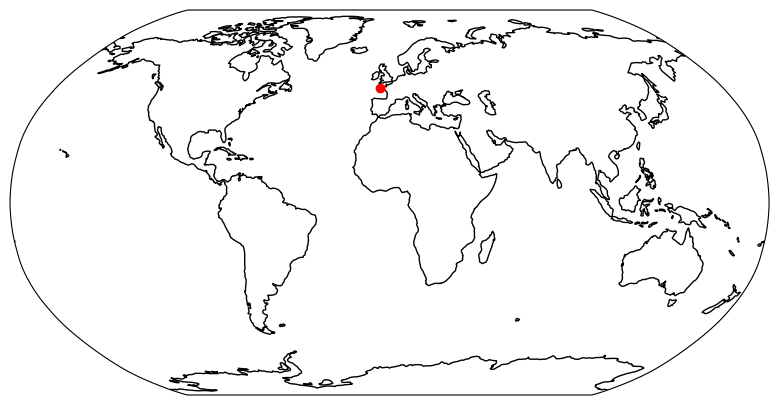

In [10]:
import cartopy.crs as ccrs
# Reproject to a projected CRS
gdf_projected = gdf.to_crs(epsg=3857)
centroids = gdf_projected.centroid

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# Make the map global rather than have it zoom in to the extents of any plotted data
ax.set_global()

# ax.stock_img()
ax.coastlines()

# Transform back to geographic CRS for plotting
gdf_centroids_geographic = centroids.to_crs(epsg=4326)

ax.plot(
    gdf_centroids_geographic.x,
    gdf_centroids_geographic.y,
    "ro",
    transform=ccrs.PlateCarree(),
)

plt.show()